# Building a Custom Visualization

A challenge that users geneally face when trying to make judgmets about probabilistic data from a bar chart is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions this problem is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.       

This code implements the bar coloring as described above, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

In [1]:
# import libraries to generate data 
import pandas as pd
import numpy as np

np.random.seed(12345)
# generate random data set to be used for plotting 
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
#import required modules for plotting 
%matplotlib notebook
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [3]:
df1=df.transpose()
errord=df1.sem()*norm.ppf(0.975)

<IPython.core.display.Javascript object>


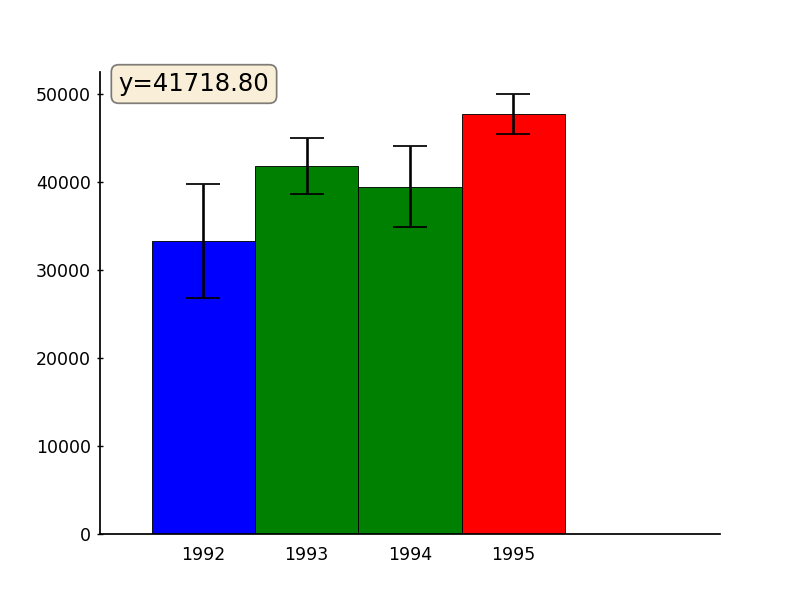

(0, 3)

In [6]:

y=41718.80344629117 #set the value of y to be used for the horizontal line and deciding the bar color

fig, ax=plt.subplots() #create fig and axes 
#plot the bar plot on axes
barp=ax.bar(x=[0.5,1,1.5,2], height=[df1[1992].mean(),df1[1993].mean(),df1[1994].mean(),df1[1995].mean()], yerr=errord, capsize=10, edgecolor='black', linewidth=0.5, width=0.5)
ax.set_xlim(0,3) 

In [7]:
#Cusomize the plot for better visibility and ink ratio
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.tick_params(axis='y', direction='inout')

In [8]:
#Make x axis ticks invisible and put the years on the x axis at right place
ax.get_xaxis().set_ticks([0.5,1,1.5,2])
ax.get_xaxis().set_ticklabels(['1992','1993','1994','1995'])
ax.get_xaxis().set_ticklabels(['1992','1993','1994','1995'])
ticks=ax.get_xaxis().get_children()[2:6]
for tick in ticks:
    tick_lile=tick.get_children()[0:3]
    for line in tick_lile:
        line.set_visible(False)

In [9]:
#set the colors for bars 
rectangles=ax.get_children()[1:5]
h_list=[rec.get_height() for rec in rectangles]

for i in range(len(rectangles)):
    rec=rectangles[i]
    max_h=rec.get_height()+errord.tolist()[i]
    min_h=rec.get_height()-errord.tolist()[i]
    if min_h>y:
        rec.set_facecolor('red')
    elif max_h<y:
        rec.set_facecolor('blue')
    else:
        rec.set_facecolor('green')

In [10]:
#customize x and y axis text
props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr=f'y={y:.2f}'
textob=ax.text(0.03, 1.0, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
